Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = ""
COLLABORATORS = "NONE"

# Numerical errors II : types of errors and general remarks
In this notebook we will check several simple examples showing the intrincacies that could arise when using floating point (FP) arithmetic. Before starting, let's make clear some key ideas:
- FP is well defined through the IEEE754 standard.
- A simple substraction could destroy 15 decimal places of precision
- You should not cast floats to integers
- You should normalize your models to natural units
- Addition is not always associative: $x + (y + z) \ne (x+y) + z$, when $x = -1.5\times 10^{38}, y = +1.5\times 10^{38}, z = 1.0$ (single precision)
- All numbers can be represented in binary: false. Check 0.1, or 0.3

For some dramatic examples of FP errors, check:
- https://www.iro.umontreal.ca/~mignotte/IFT2425/Disasters.html
- https://web.ma.utexas.edu/users/arbogast/misc/disasters.html
- https://slate.com/technology/2019/10/round-floor-software-errors-stock-market-battlefield.html
- https://stackoverflow.com/questions/2732845/real-life-example-fo-floating-point-error

# Kind of errors
- Probability of an error: `start` $\to U_1 \to U_2 \to \ldots \to U_n \to$ `end`
- Blunders: Typographical, wrong program, etc
- Random errors: Electronics, alien invasion, etc
- Approximation: (mathematical series truncation)
- Roundoff and truncation of a number in the computer representation

## Roundoff/truncation example
Let's compute the following sum as a function of $k$,
$$f(k) = \left|\frac{k}{10} - \sum_{i=1}^k 0.1\right|$$
Mathematically, this function should give 0 always. Is that true?




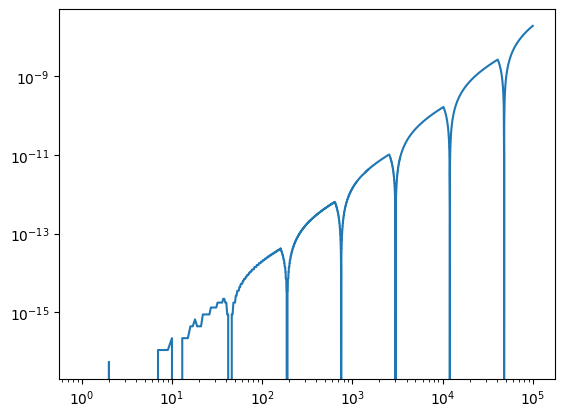

In [18]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
def plot_diff(kmax):
    """
    This function computes and plot the function f(k), up to a kmax
    """
    # YOUR CODE HERE
    function = np.zeros(kmax)
    k = 0.1
    for i in range(1,kmax+1):
          function[i-1] = np.abs(i/10.0-k)
          k = k + 0.1  # OJO: Practicar la manera en la que hago sumatorias o sumas
    plt.loglog(function)
    plt.show()

#    raise NotImplementedError()

plot_diff(100000)

![Untitled.png](attachment:Untitled.png)

## Substractive cancellation
Given $a = b-c$, then $a_c = b_c-c_c$, therefore
\begin{align}
a_c &= a(1+\epsilon_a ) = b_c - c_c = b(1+\epsilon_b ) - c(1+\epsilon_c )\\
\frac{a_c}{a} &= 1 + \epsilon_b \frac{b}{a} - \frac{c}{a}\epsilon_c  
\end{align}
so the error in $a$ is about
$$\epsilon_a = \frac{b}{a}(\epsilon_b - \epsilon_c), $$
which is much larger, when $b$ and $c$ are close (so $a$ is small).

### Example of substrative cancellation
The following series,
$$S_N^{(1)} = \sum_{n=1}^{2N} (-1)^n \frac{n}{n+1},$$
can be written in two mathematically equivalent ways:
$$S_N^{(2)} = -\sum_{n=1}^{N} \frac{2n-1}{2n} + \sum_{n=1}^{N} \frac{2n}{2n+1},$$
and
$$S_N^{(3)} = \sum_{n=1}^{N} \frac{1}{2n(2n+1)}.$$

**Could there be any computational difference? why?**

Write a program that compute all sums, and , assuming that $S_n^{(3)}$ is the best option (why?), plots the relative difference with the other sums as a function of $N$.

In [ ]:
# Substracting cancellation
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def sum1(N):
    # YOUR CODE HERE
    data = np.zeros(2*N)
    for i in range(1,2*N+1):
      suma = np.zeros(i)
      for j in range(0,i):
        suma[j] = (((-1)** n) * n)/(n+1)
      n = n + 1.0

    raise NotImplementedError()

def sum2(N):
    # YOUR CODE HERE
    raise NotImplementedError()

def sum3(N):
    # YOUR CODE HERE
    raise NotImplementedError()

def plot_diff_sums(N):
    """
    Plots the relative difference among three sums which are the same mathematically
    """
    adata = np.zeros(N+1)
    bdata = np.zeros(N+1)
    for n in range(1, N+1):
        #print n, sum1(n), sum2(n), sum3(n)
        #adata[n] = sum1(n)
        #bdata[n] = sum3(n)
        adata[n] = abs((sum1(n) - sum3(n))/sum3(n))
        bdata[n] = abs((sum2(n) - sum3(n))/sum3(n))

    fig, axes = plt.subplots()
    axes.plot(adata, "o-", ms=6.0, label="%sum1")
    axes.plot(bdata, "g*--", ms = 9.0, label="%sum2")
    axes.set_xscale("log")
    axes.set_yscale("log")
    axes.legend(loc=2)

plot_diff_sums(1000)

![Untitled.png](attachment:Untitled.png)

## Significant figures and relative precision
Even simple cases like changing a sum order can give surprising results: Compute the following two sums and plot their relative difference as functions of $N$,
$$S_N^{(1)}  = \sum_{n=1}^{N} \frac{1}{n}$$
$$S_N^{(2)}  = \sum_{n=N}^{1} \frac{1}{n}$$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Significant figures
def plot_sum_sigfig(NMAX):
    xdata = np.arange(1, NMAX+1)
    ydata = np.zeros(NMAX)
    sumup = 0.0
    sumdown = 0.0
    # YOUR CODE HERE
    raise NotImplementedError()

plot_sum_sigfig(100000)

![Untitled.png](attachment:Untitled.png)

## Multiplicative errors
When you multiply numbers, like in the expression $a = b\times c$, it is possible to show that the error is
$$1 + \epsilon_a + \epsilon_b$$

## Errors in algorithms and their computational implementation
As you can see, there are several source for errors in computation. Some come from the mathematical approximation, , called $\epsilon_a$, and some others are intrinsic from the numerical representation, and we can call them $\epsilon_r$. Sometimes, the rounding/truncation error are modeled as a random walk, $\epsilon_r \simeq \sqrt{N} \epsilon_m$, where $\epsilon_m$ is the machine precision, and $N$ is the representative number of "steps".  From here, the total error can be estimated as
\begin{align}
\epsilon_{\rm tot} &= \epsilon_a + \epsilon_r \\
&= \frac{\alpha}{N^\beta} + \sqrt{N} \epsilon_m.
\end{align}
You can derive this equation an compute the optimal value for $N$, which will depend on the order of the mathematical algorithm and the machine precision. The next table show some examples that illustrate this point:

![CleanShot%202022-08-21%20at%2000.12.12@2x.png](attachment:CleanShot%202022-08-21%20at%2000.12.12@2x.png)
